# Chapter 8: Hierarchical Clustering

In [1]:
%reset
%matplotlib inline
low_memory=False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from scipy.stats import mode
import scipy.cluster.hierarchy as shc

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 8.1 Introduction & Motivation

Just like last time, we are passing our data and asking ourself the following question: within the given data, are there any **groups** or **clusters** of datapoints that belong together?

However, this time we will be having a look at hierarchical clustering. This method of clustering starts by looking at each individual datapoint and works it's way up until only one cluster remains. We can then define when to stop merging clusters and what the ideal amount of clusters is.

## 8.2 Problem Setting

Consider an automobile manufacturer that has created prototypes for a new vehicle. Prior to launching this new model, the manufacturer aims to identify which current vehicles on the market closely resemble the prototypes. This involves categorizing vehicles, determining which category is most similar to the new model, and identifying the models it will compete against.

The goal is to employ clustering techniques to identify the most distinct groups of vehicles. This will provide an overview of the current market and assist manufacturers in making informed decisions regarding the introduction of new models.

## 8.3 Model

First, let's have a look at the data.

In [2]:
df = pd.read_csv("Cars.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   117 non-null    object 
 1   model      117 non-null    object 
 2   sales      117 non-null    float64
 3   resale     117 non-null    float64
 4   type       117 non-null    float64
 5   price      117 non-null    float64
 6   engine_s   117 non-null    float64
 7   horsepow   117 non-null    float64
 8   wheelbas   117 non-null    float64
 9   width      117 non-null    float64
 10  length     117 non-null    float64
 11  curb_wgt   117 non-null    float64
 12  fuel_cap   117 non-null    float64
 13  mpg        117 non-null    float64
 14  lnsales    117 non-null    float64
 15  partition  117 non-null    float64
dtypes: float64(14), object(2)
memory usage: 14.8+ KB


##### Question 1: Try and plot a heatmap to further explore the data. There will be two columns you will not be able to plot. Drop them from the heatmap, but do not drop them from your dataframe as we will be needing them later. You can also store them in a seperate dataframe if you wish.

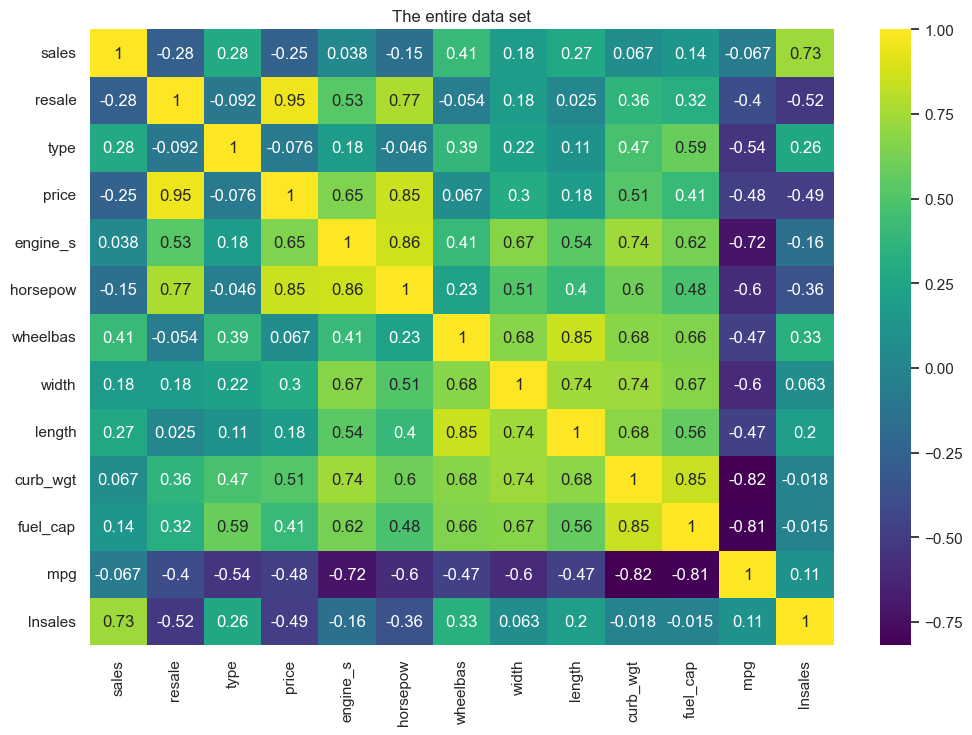

In [4]:
dfheat=pd.read_csv("Cars.csv")
df2=dfheat.drop(['manufact','model','partition'],axis=1)
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),cmap='viridis',annot=True)
plt.title("The entire data set")
plt.show() 

##### Question 2: You will notice one column who acts different thant what we are used to. Why is this? Can we use this column? If not, drop the column.

Model, partation, manufacture we have to drop from the dataset. So there will be 3 rows we need to drop.

## 8.4 Model Evaluation

##### Question 3: Create a dendogram of the model. Remember to exclude the two columns we are keeping to the side on your model. Instead, do some research on the parameters and use one or both of them as labels.

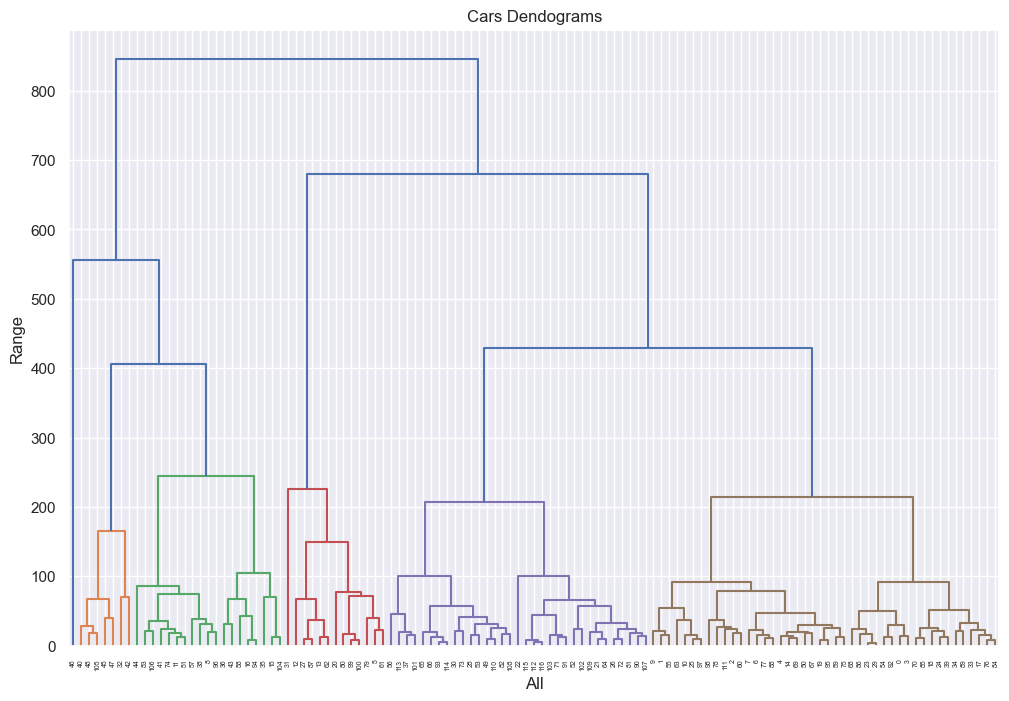

In [7]:
plt.figure(figsize=(12, 8))
plt.title("Cars Dendograms")
plt.xlabel('All')
plt.ylabel('Range')
plt.grid(True)
Z = shc.linkage(df2, method='ward')
dend = shc.dendrogram(Z, color_threshold=280)

##### Question 4: Think about the proces behind merging two clusters. By looking at the dendrogram, what would you think is a good amount of clusters? Why?

5 clusterts will be the best or good

##### Question 5: Calculate the best amount of clusters. Look back to the dendrogram. Does this amount make sense?

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit_predict(df2)

array([1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 4,
       4, 1, 1, 1, 4, 2, 4, 1, 4, 2, 0, 1, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 4, 1, 0, 4, 4, 1, 1, 4, 0, 0, 1, 1, 2, 2, 1, 4, 4,
       4, 1, 1, 1, 1, 4, 4, 4, 0, 1, 1, 1, 1, 2, 2, 4, 4, 0, 1, 1, 1, 2,
       1, 1, 4, 4, 1, 4, 0, 1, 0, 1, 1, 2, 2, 4, 4, 4, 0, 0, 0, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4], dtype=int64)

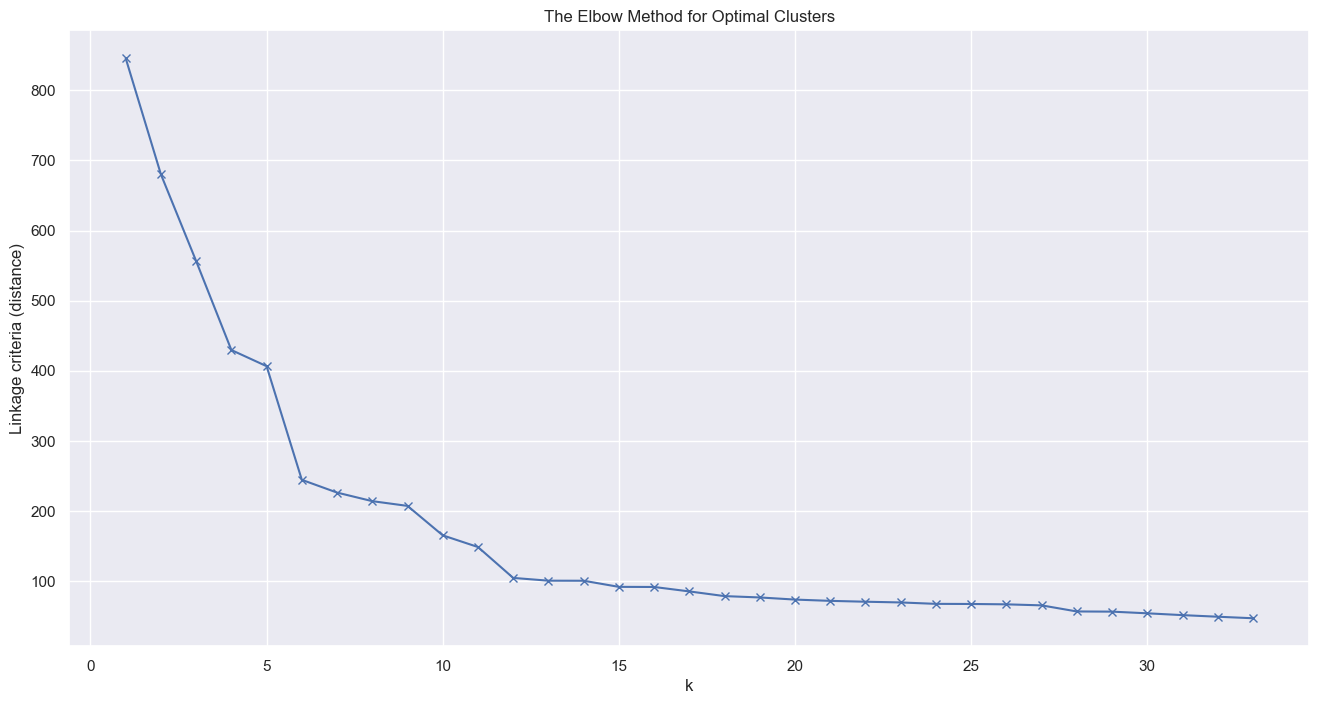

In [10]:

Z = shc.linkage(df2, method='ward')

# Take the last 33 linkage distances
filtered = Z[-33:, 2]  # Only take the last 33 rows, third column for distances
inverted = filtered[::-1]  # Reverse the order for correct plotting

# Plot the Elbow method
plt.figure(figsize=(16, 8))
plt.plot(range(1, 34), inverted, 'bx-')
plt.xlabel('k')
plt.ylabel('Linkage criteria (distance)')
plt.title('The Elbow Method for Optimal Clusters')
plt.show()

##### Question 6: Draw a line on the dendrogram to visualize the amount of clusters you have found. Do these groups make sense? Are the amount of cars in each cluster balanced? Elaborate.

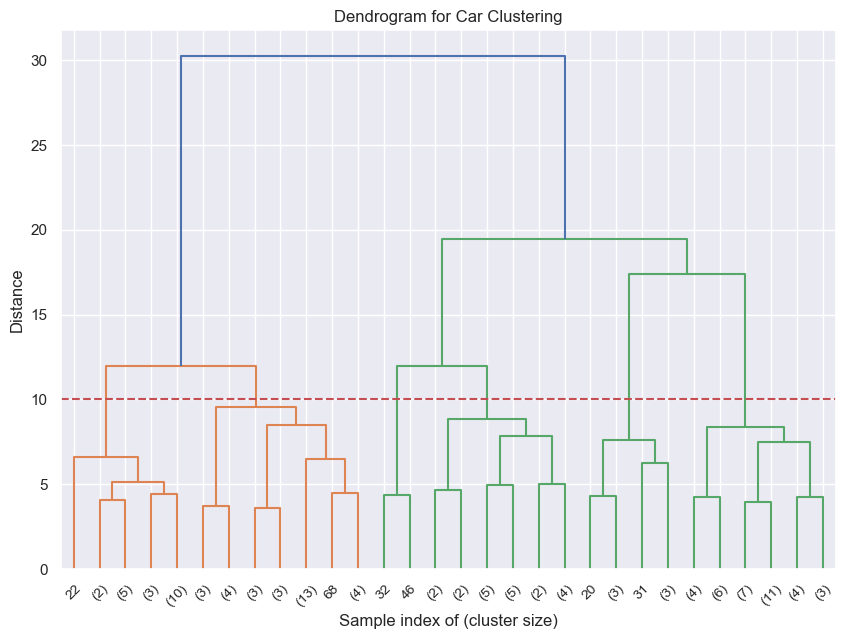

In [12]:

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)
Z=linkage(scaled_features,method='ward')
plt.figure(figsize=(10,7))
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=45,leaf_font_size=10.)
plt.axhline(y=10,color='r',linestyle='--')
plt.title('Dendrogram for Car Clustering')
plt.xlabel('Sample index of (cluster size)')
plt.ylabel('Distance')
plt.show()

## 8.4 Exercises

##### Question 1: See section 8.3
##### Question 2: See section 8.3
##### Question 3: See section 8.3
##### Question 4: See section 8.3
##### Question 5: See section 8.3
##### Question 6: See section 8.3
##### Question 7: Consider the cars dataset. Which clustering method would you prefer? Why?

Hierarchical Clustering (using Ward’s linkage):

Why It Works: Hierarchical clustering, particularly with Ward's linkage, is effective when we want to see a nested grouping of cars. The dendrogram offers a visual understanding of how individual cars or small clusters are merged, which helps interpret relationships between different clusters.
Advantages: Provides a full view of cluster structure, and it’s easy to adjust the number of clusters by setting a cutoff line in the dendrogram.
Limitations: Hierarchical clustering can be computationally expensive for large datasets, but for a smaller dataset like cars, this is manageable.
K-Means Clustering:

Why It Works: K-means is efficient and works well with standardized numeric data, making it suitable for the numerical features (like price, engine size, and horsepower) in the cars dataset. It’s also useful if we know or can reasonably estimate the number of clusters.
Advantages: It’s computationally faster, especially with larger datasets, and works well when clusters are spherical and balanced.
Limitations: K-means assumes that clusters are roughly equal in size and density, which may not be true for cars. It’s also sensitive to the choice of k and requires pre-specifying the number of clusters.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Why It Works: DBSCAN is useful when clusters are of varying shapes and densities. If there are outliers or distinct types of cars (luxury, economy, etc.), DBSCAN can handle these without forcing them into clusters.
Advantages: Identifies clusters based on density, allowing for arbitrary shapes and detecting outliers as noise.
Limitations: It requires tuning of parameters like eps (distance threshold) and min_samples, and may struggle with data that lacks dense cluster regions or if the features are not normalized effectively.
Preferred Method
For this dataset, hierarchical clustering is likely the best initial choice. The dendrogram provides interpretability and allows for flexible clustering choices by adjusting the cutoff height. This visual tool can help understand the natural groupings and potentially guide the choice of k for methods like K-means if more refined clustering is needed later.

##### Question 8: Calculate the best amount of k for k means

##### Question 9: Consider 'mpg' as the dependant variable. Calculate the best value of k and plot the graph for the following columns as independent variables:
- sales
- resale
- price
- engine_s
- horsepow
- wheelbas
- width
- length
- curb_wgt
- fuel_cap
- lnsales

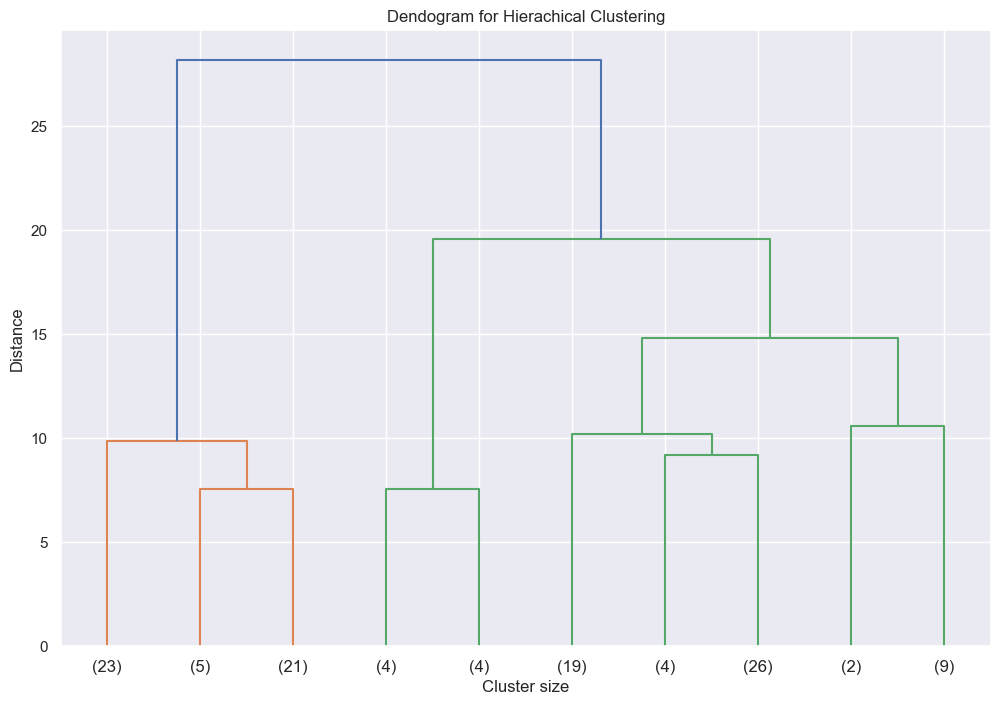

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
df=pd.read_csv('Cars.csv')
inde_vars=['sales','resale','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','lnsales']
scaler=StandardScaler()
normalized_data=scaler.fit_transform(df[inde_vars])
linked=linkage(normalized_data, method='ward')
plt.figure(figsize=(12,8))
plt.title("Dendogram for Hierachical Clustering")
dendrogram(linked,truncate_mode='lastp',p=10,show_leaf_counts=True)
plt.xlabel("Cluster size")
plt.ylabel('Distance')
plt.show()

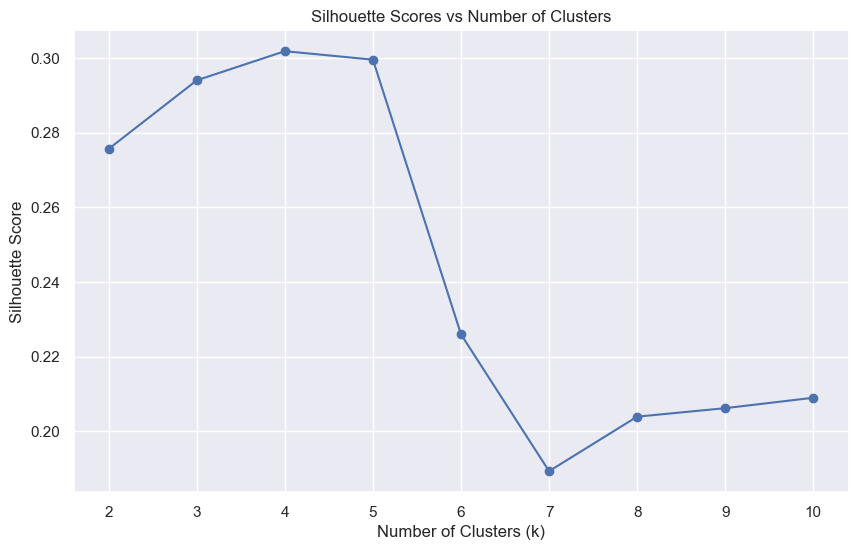

The optimal number of clusters 10 is :4


In [23]:
cluster_range = range(2, 11)
silhouette_scores_list = []  # Rename the list to avoid confusion

for k in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = clustering.fit_predict(normalized_data)
    score = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores_list.append(score)

    
plt.figure(figsize=(10,6))
plt.plot(cluster_range,silhouette_scores_list,marker='o')
plt.title("Silhouette Scores vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
    
best_k=cluster_range[np.argmax(silhouette_scores_list)]
print(f"The optimal number of clusters {k} is :{best_k}")

##### Question 10: Do the same but with hierarchical clustering.

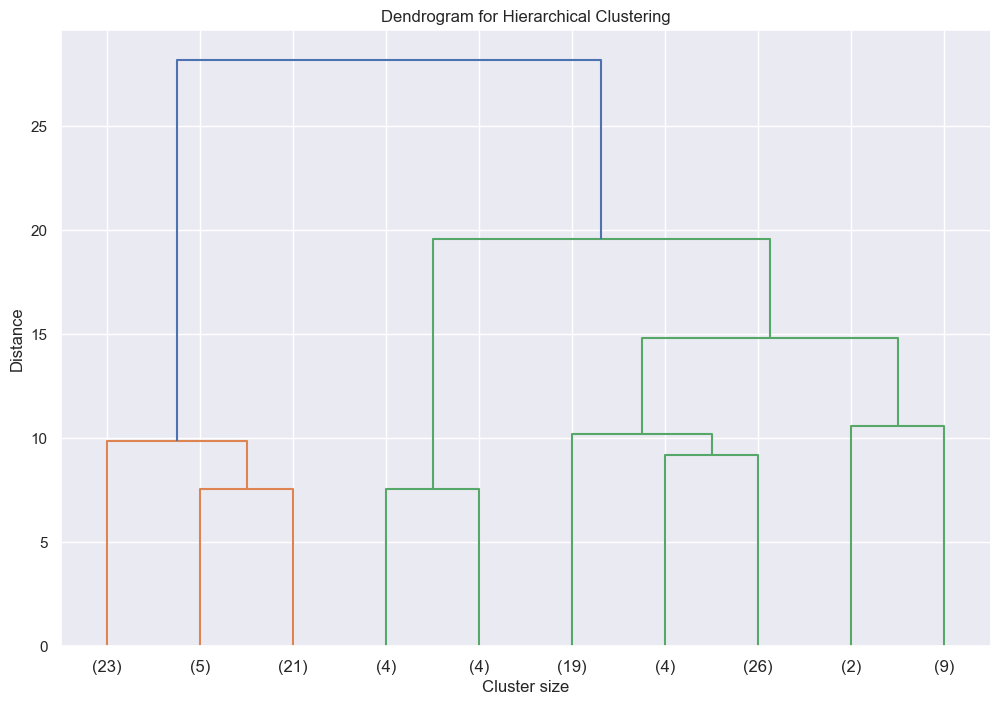

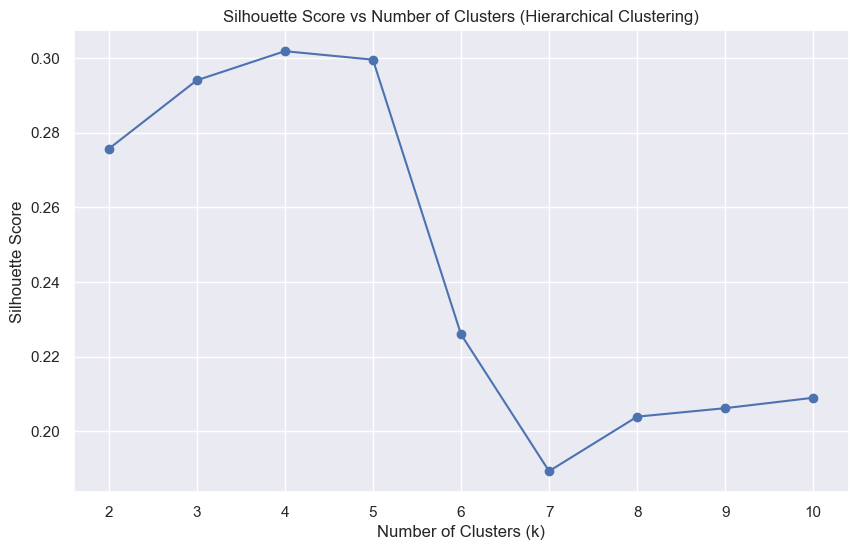

The optimal number of clusters (k) is: 4
   Cluster   sales  resale  price  engine_s  horsepow  wheelbas  width  \
0        1  16.919  16.360  21.50       1.8     140.0     101.2   67.3   
1        3  39.384  19.875  28.40       3.2     225.0     108.1   70.3   
2        3   8.588  29.725  42.00       3.5     210.0     114.6   71.4   
3        1  20.397  22.255  23.99       1.8     150.0     102.6   68.2   
4        3  18.780  23.555  33.95       2.8     200.0     108.7   76.1   

   length  curb_wgt  fuel_cap  lnsales  
0   172.4     2.639      13.2    2.828  
1   192.9     3.517      17.2    3.673  
2   196.6     3.850      18.0    2.150  
3   178.0     2.998      16.4    3.015  
4   192.0     3.561      18.5    2.933  


In [25]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[inde_vars])

# Perform hierarchical clustering
linked = linkage(normalized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# Determine the best number of clusters (k) using Silhouette Scores
cluster_range = range(2, 11)
silhouette_scores_list = []

for k in cluster_range:
    # Cut the dendrogram at `k` clusters
    cluster_labels = fcluster(linked, k, criterion='maxclust')
    score = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores_list.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores_list, marker='o')
plt.title("Silhouette Score vs Number of Clusters (Hierarchical Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Print the best k
best_k = cluster_range[np.argmax(silhouette_scores_list)]
print(f"The optimal number of clusters (k) is: {best_k}")

# Assign final clusters based on the best k
final_cluster_labels = fcluster(linked, best_k, criterion='maxclust')
data['Cluster'] = final_cluster_labels  # Add the cluster labels to the dataset

# Display the data with cluster labels
print(data[['Cluster'] + independent_vars].head())
